In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt

# berechnet den Preis der Aktie in bestimmten Knoten (i,j)

def AktienPreis(S0,r,sigma,T,N,i,j):
    
    # Konstanten definieren
    dt = T/N
    R = np.exp(r*dt)
    u = np.exp(sigma * sqrt(dt))
    d = 1 / u
    p = (R-d) / (u-d)
     
    if i<j:
        print("i muss >= j sein")
    else:          
        S = S0 * u**j * d**(i-j)
                 
    return(S)

# berechnet alle Aktienpreise und speichert sie in einem Array

def AlleAktienPreise(S0,r,sigma,T,N):
    
    # Array
    aap = np.zeros((N+1, N+1))
    
    #durchläuft alle Kombinationen für i,j (i>j) und speichert sie in einem Array
    for i in range(0, N+1):
        for j in range(0, N+1):
            if j <= i:
                aap[i][j] = AktienPreis(S0,r,sigma,T,N,i,j)
                
    return(aap)

# berechnet alle Put-Preise

def AllePutPreise(S0,K,r,sigma,T,N):
    
    # Konstanten definieren
    dt = T/N
    R = np.exp(r*dt)
    u = np.exp(sigma * sqrt(dt))
    d = 1 / u
    p = (R-d) / (u-d) 
        
    #speichert alle Aktienpreise in "preise"
    preise = AlleAktienPreise(S0,r,sigma,T,N)
  
    #Array für Put-Preise
    PutPreise = np.zeros((N+1, N+1))
    #Array für Boundary Knoten
    Boundary = np.zeros((N+1, N+1))
           
    for i in range(len(PutPreise)-1, -1, -1):
        for j in range(0,i+1):
            default = K - preise[i][j]
            if default <= 0:
                default = 0
                Boundary[i][j]=2
            if i == len(PutPreise)-1:
                PutPreise[i][j] = default
                if preise[i][j] <= K:
                    Boundary[i][j]=1
            else: 
                E = 1/R *(p * PutPreise[i+1][j+1] + (1-p) * PutPreise[i+1][j])
                if E == 0:
                    Boundary[i][j]=2 
                else:
                    PutPreise[i][j] = max(E, default)
                    if PutPreise[i][j] > default: 
                        Boundary[i][j]=2
                    elif PutPreise[i][j] == default :
                        Boundary[i][j]=1
    #print(PutPreise)
    print(Boundary)

In [3]:
AktienPreis(100,0.05,0.25,1,12,2,1)

100.0

In [4]:
AlleAktienPreise(100,0.05,0.25,1,12)


array([[100.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ 93.03738507, 107.48367436,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ 86.5595502 , 100.        , 115.52740254,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ 80.53274203,  93.03738507, 107.48367436, 124.17309715,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ 74.92555731,  86.5595502 , 100.        , 115.52740254,
        133.46580739,   0.        ,   0.        ,   0.        ,
          0.

In [5]:
AllePutPreise(100,100,0.04,0.25,1,12)

[[ 8.21223402  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [11.30381818  5.23710426  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [15.16309087  7.59687411  2.95940581  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [19.78405524 10.7352837   4.57179259  1.39900483  0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [25.07444269 14.73083345  6.89104448  2.32939921  0.49656735  0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [30.29122073 19.56364822 10.09257829  3.79944205  0.90431512  0.10030128
   0.          0.          0.          0.          0.          0.
   0.        ]
 [35.14477461 25.07444269 14.29299437  6.04334353  1.62577819  0.20333749
   0.          0.          0.       

In [7]:
AllePutPreise(100,100,0.04,0.25,1,12)

[[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0.]
 [1. 1. 1. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0.]
 [1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 0. 0. 0.]
 [1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 0. 0.]
 [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 0.]
 [1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2.]]


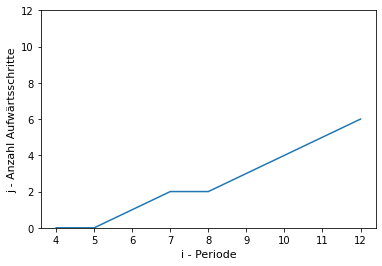

In [8]:
# Visualisierung der Boundary Knoten
i = [4,5,6,7,8,9,10,11,12]
j = [0,0,1,2,2,3,4,5,6]
fig, ax = plt.subplots()
ax.set_xlabel("i - Periode", fontsize = 11)
ax.set_ylabel("j - Anzahl Aufwärtsschritte", fontsize = 11)
plt.ylim([0,12])
ax.plot(i, j)

In [13]:
# berechnet den Wert der Option in einem bestimmten Knoten (nk,ak)

def Put(nk, ak, K, S0, u, d,N, R, p):

    # a0 ist die Anzahl der Aufwärtsbewegungen, für die der Preis der Aktie in Periode N größer dem Strikepreis ist
    a0 = int(np.ceil(np.log(K/(S0*d**N))/np.log(u/d))) 
    n0=N
    
    if nk == n0:
        if ak <= a0-1:
            return (K - S0*u**(ak)*d**(n0-ak))
        else:
            return 0
            
    else:
        default1 = K - S0*u**(ak)*d**(nk-ak)
        if default1 > 0:
            E = (1/R)*(p*Put(nk+1, ak+1, K, S0, u, d,N, R, p)) + ((1-p)/R)*Put(nk+1, ak,K, S0, u, d,N, R, p)
            return max(E, default1)
        else:
            default1 = 0
            E = (1/R)*(p*Put(nk+1, ak+1, K, S0, u, d,N, R, p)) + ((1-p)/R)*Put(nk+1, ak,K, S0, u, d,N, R, p)
            return max(E, default1)
          
# berechnet den Zeitwert einer Put-Option in einem bestimmten Knoten

def timevalue(nk, ak, K, S0, u, d, N, R, p):
    return (Put(nk, ak, K, S0, u, d, N, R, p) - (K - S0*(u**ak)*d**(nk-ak)))

# berechnet ik, nk und ak
def BoundaryKnoten(S0, K, r, sigma, T, N):
    dt = T/N
    R = np.exp(r*dt)
    u = np.exp(sigma * sqrt(dt))
    d = 1 / u
    p = (R-d) / (u-d)
    a0 = int(np.ceil(np.log(K/(S0*d**N))/np.log(u/d)))
    n =np.zeros(N+1, int)
    a =np.zeros(N+1, int)
    i = np.zeros(N+1, int)
    n[0] = N
    a[0] = a0
    K1 = K*((R-1)/(R-p))
    
    for k in range(N):
        t = timevalue(int(n[k]), int(a[k]), K, S0, u, d, N, R, p)
        print(t)
        VP = np.log(K1/(K1+t))/np.log(p/R)
        print(VP)
        if np.ceil(VP) <= N:
            i[k+1] = np.ceil(VP)
            n[k+1] = n[k] - i[k+1]
            a[k+1] = a[k] - i[k+1] + 1
            if a[k+1] <= 0:
                break
            else:
                print(i)
                print(n)
                print(a)
        else:
            break
    print(i)
    print(n)
    print(a)   
    return i, n, a 

In [14]:
BoundaryKnoten(100,100,0.04,0.25,1,12)

15.527402544014294
4.64056633317107
[0 5 0 0 0 0 0 0 0 0 0 0 0]
[12  7  0  0  0  0  0  0  0  0  0  0  0]
[7 3 0 0 0 0 0 0 0 0 0 0 0]
2.3546469707913893
2.1958012140010776
[0 5 3 0 0 0 0 0 0 0 0 0 0]
[12  7  4  0  0  0  0  0  0  0  0  0  0]
[7 3 1 0 0 0 0 0 0 0 0 0 0]
1.2903836466124918
1.5640268593420856
[0 5 3 2 0 0 0 0 0 0 0 0 0]
[12  7  4  2  0  0  0  0  0  0  0  0  0]
[7 3 1 0 0 0 0 0 0 0 0 0 0]


(array([0, 5, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([12,  7,  4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 array([7, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [15]:
array_i, array_n, array_a = BoundaryKnoten(100,100,0.04,0.25,1,12)

15.527402544014294
4.64056633317107
[0 5 0 0 0 0 0 0 0 0 0 0 0]
[12  7  0  0  0  0  0  0  0  0  0  0  0]
[7 3 0 0 0 0 0 0 0 0 0 0 0]
2.3546469707913893
2.1958012140010776
[0 5 3 0 0 0 0 0 0 0 0 0 0]
[12  7  4  0  0  0  0  0  0  0  0  0  0]
[7 3 1 0 0 0 0 0 0 0 0 0 0]
1.2903836466124918
1.5640268593420856
[0 5 3 2 0 0 0 0 0 0 0 0 0]
[12  7  4  2  0  0  0  0  0  0  0  0  0]
[7 3 1 0 0 0 0 0 0 0 0 0 0]


In [16]:
# berechnet die Boundary Knoten und setzt sie in den array "EmptySquare" ein
def FillTheSquare(N):
    EmptySquare = np.zeros((N+1, N+1), int)
    EmptySquare[N][array_a[0]-1] = 1
    for i in range(1, len(array_i)):
        array_i[i] = array_i[i-1] + array_i[i]
    for i in range(1, len(array_a)):
        if array_a[i] > 0:
            EmptySquare[N-array_i[i]][array_a[i]-1] = 1
            EmptySquare[N-array_i[i]+1][array_a[i]-1] = 1
    for i in range(N):
        for j in range(N):
            if EmptySquare[i][j] == 1:
                if EmptySquare[i+1][j] == 1:
                    continue
                else:
                    EmptySquare[i+1][j+1]=1
    print(EmptySquare)
    return EmptySquare

In [17]:
SquareWithBoundary = FillTheSquare(12)

[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]]


In [18]:
# berechnet den Preis der Put Option auf Basis der Optimal Exercise Boundary
def PutBoundary(S0,K,r,sigma,T,N,i,j):
    dt = T/N
    R = np.exp(r*dt)
    u = np.exp(sigma * sqrt(dt))
    d = 1 / u
    a0 = int(np.ceil(np.log(K/(S0*d**N))/np.log(u/d)))
    p = (R-d) / (u-d)
    if i == N:
        if j >= a0:
            return 0
        else:
            return (K - S0*(u**j)*d**(i-j))
    for k in range(i, N):
        if SquareWithBoundary[k,j] == 1:
            return Put(i, j, K, S0, u, d,N, R, p)
            break
    return (K - S0*(u**j)*d**(i-j))



In [19]:
print(PutBoundary(100,100,0.04,0.25,1,12,3,3))

1.3990048317821826
